# 데이터 시각화

In [2]:
# module import
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
try:
    %matplotlib qt
except ImportError: # version 변경되면서 설치해주어야 함.
    !pip install PyQt5
    %matplotlib qt

In [4]:
%matplotlib inline

## Matplotlib 라이브러리

 기존의 파이썬에서 변수에 할당하는 게 아니라 좀 작동 방식이 다르다. 전역으로 조정.

### 1. 선그래프

* `plt.plot([x, ], y, [,fmt])` : x 데이터와 포맷스트링은 선택

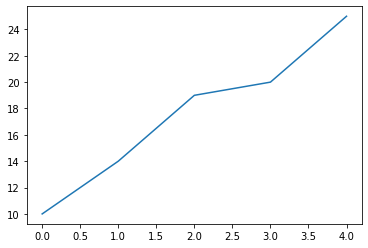

In [5]:
# 기본적인 선 그래프 그리기
data1 = [10, 14, 19, 20, 25]

plt.plot(data1) # y값만 입력
plt.show() # 명시적으로 figure 보여줄 때. 안 적어도 무방.

[array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
        1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]), array([40.5, 32. , 24.5, 18. , 12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5,
        2. ,  4.5,  8. , 12.5, 18. , 24.5, 32. , 40.5])]


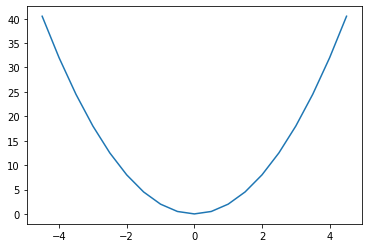

In [6]:
# numpy 이용 2차함수 
x = np.arange(-4.5, 5, 0.5)
y = 2*(x**2)
print([x, y]) # y = 2x^2 벡터로

plt.plot(x, y) # x, y 모두 인자로 전달
plt.show()

x, y1: [array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
        1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]), array([40.5, 32. , 24.5, 18. , 12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5,
        2. ,  4.5,  8. , 12.5, 18. , 24.5, 32. , 40.5])]
x, y2: [array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
        1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]), array([ 7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5,
       35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5])]
x, y3: [array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
        1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]), array([91., 74., 59., 46., 35., 26., 19., 14., 11., 10., 11., 14., 19.,
       26., 35., 46., 59., 74., 91.])]


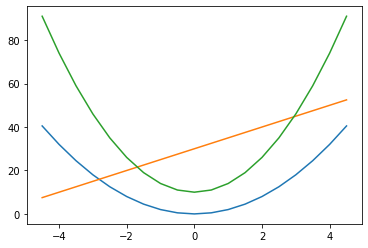

In [7]:
# 2차 함수, 1차 함수 여러 개 그리기

x = np.arange(-4.5, 5, 0.5)

y1 = 2*(x**2)
y2 = 5*x+30
y3 = 4*(x**2)+10
print(f"x, y1: {[x, y1]}")
print(f"x, y2: {[x, y2]}")
print(f"x, y3: {[x, y3]}")

# 한 번에 그래프 그리기
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

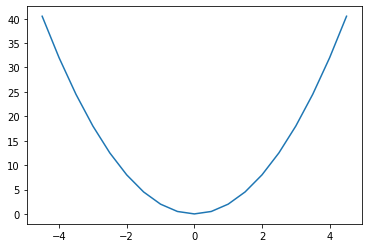

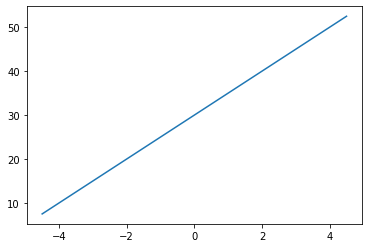

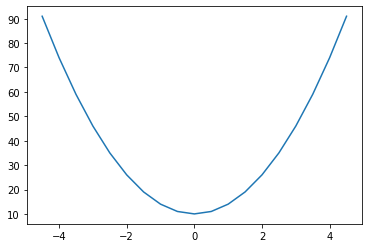

In [8]:
# 처음으로 그리기 함수를 수행하면 그래프 창이 자동으로 생성
plt.plot(x, y1) 

# 새로운 그래프 창 생성
plt.figure()
plt.plot(x, y2) # 하나의 그래프 그림

# 새로운 그래프 창 생성
plt.figure()
plt.plot(x, y3)

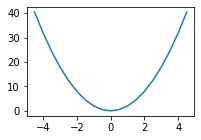

In [9]:
# 그래프 크기 조정
plt.figure(figsize = (3, 2))
plt.plot(x, y1)

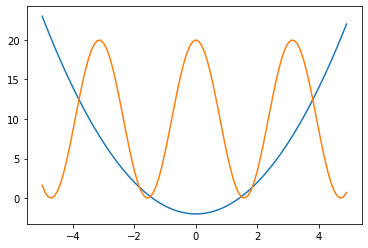

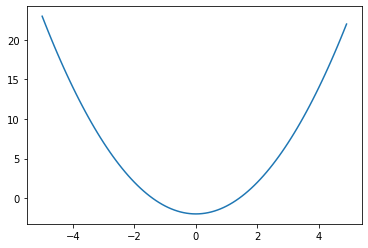

In [10]:
# figure별 번호 매기기
x = np.arange(-5, 5, 0.1)
y1 = x**2 - 2
y2 = 20*np.cos(x)**2 # NumPy의 cos 함수

# figure에 이름 붙이기
plt.figure(1) # 1번 그래프 창 선택
plt.plot(x, y1) # 지정된 그래프 창에 그림 그림

plt.figure(2)
plt.plot(x, y2)

plt.figure(1) # 이미 지정된 1번 그래프 창 지정
plt.plot(x, y2) # 지정된 그래프 창에 그래프 그림

plt.figure(2)
plt.clf() # clear figure: 지정된 창에 그려진 그래프 모두 초기화
plt.plot(x, y1)

plt.show()

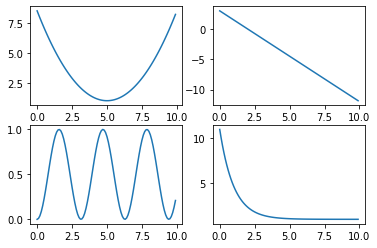

In [11]:
# 데이터 생성

x = np.arange(0, 10, 0.1)
y1 = 0.3*(x-5)**2 + 1
y2 = -1.5*x + 3
y3 = np.sin(x)**2
y4 = 10*np.exp(-x) + 1

# 2x2칸으로 이루어진 sub plot에서 p에 따라 위치를 지정
plt.subplot(2, 2, 1) # subplot 생성, p는 1
plt.plot(x, y1)
plt.subplot(2, 2, 2) 
plt.plot(x, y2)
plt.subplot(2, 2, 3) 
plt.plot(x, y3)
plt.subplot(2, 2, 4)
plt.plot(x, y4)

#### 상관관계 조사 후 그래프 그리기

In [12]:
# boston 집 가격 데이터
boston = load_boston()

print(dir(boston))
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

display(boston_df.head(7))
print(f"boston 데이터셋: {boston_df.shape}\n")
print(boston_df.info()) # 데이터 셋 전체적으로 확인

['DESCR', 'data', 'feature_names', 'filename', 'target']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


boston 데이터셋: (506, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


#### 데이터를 까보자!

1. 여러 그래프를 한 번에 그려보자.

`subplots(행의 수, 열의 수, 그래프 크기)`

2. 데이터를 확인해 보자.
    * 뚝뚝 끊기는 애들은 범주형 변수일 수 있다.
    * 상관관계: 음의 상관관계/양의 상관관계.

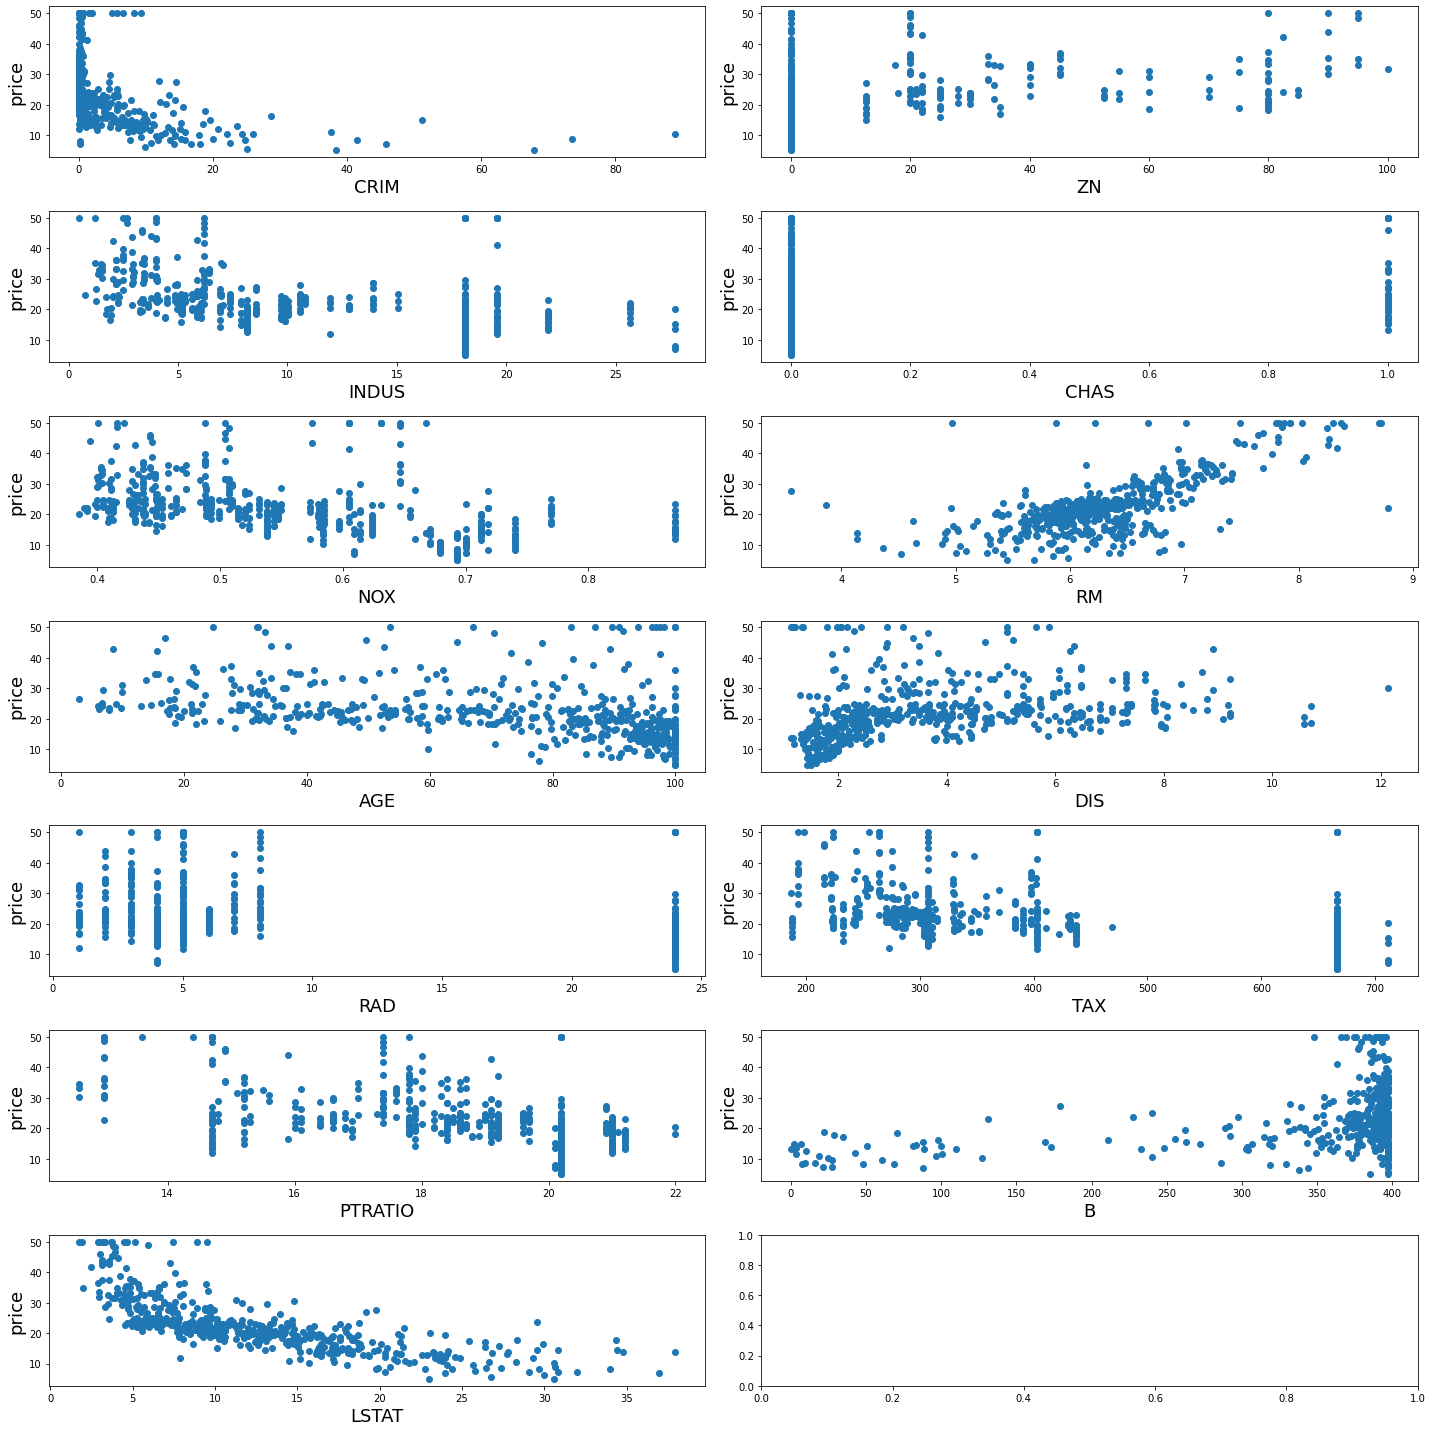

In [13]:
# 한 번에 시각화
fig, axs = plt.subplots(7, 2, figsize=(20, 20)) # subplot 생성
axs = axs.ravel() # 평활화

for ax, column in zip(axs, boston_df.columns):
    ax.plot(boston_df[column], y, 'o') # 'o': 산점도
    ax.set_ylabel('price', fontsize=18)
    ax.set_xlabel(column, fontsize=18)

plt.tight_layout()

## 2. 상관관계 겉핥기
- 대칭을 이룬다! 

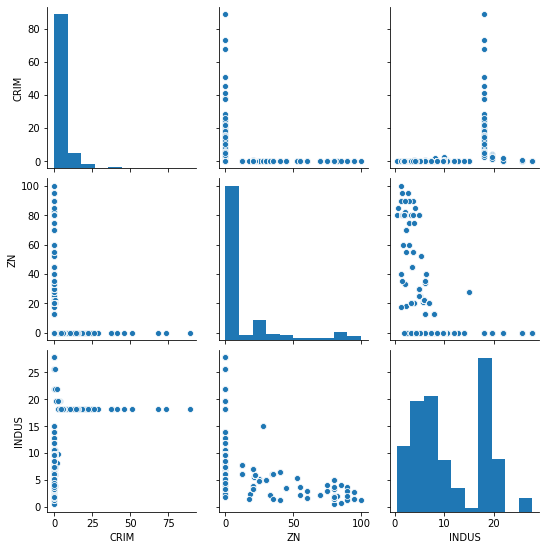

In [15]:
# Seaborn 사용

# sns.pairplot(boston_df.iloc[:, :3]) # 너무 오래 걸려서 모든 컬럼 다 하지 않겠다.
sns.pairplot(boston_df.iloc[:, :3])

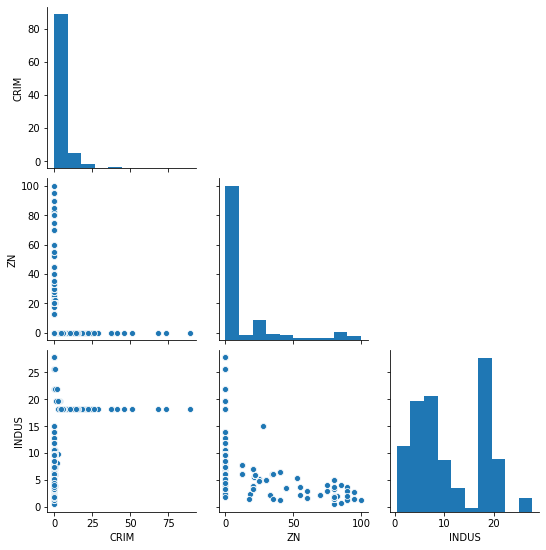

In [16]:
# 대칭을 이루는 그림 위쪽 날리는 함수
def hide_current_axis(*args, **kwargs):
    plt.gca().set_visible(False)

pp = sns.pairplot(boston_df.iloc[:, :3])
pp.map_upper(hide_current_axis) # 각각이 루프 돌면서 정의된 함수 호출

### 연습문제

 네이버 주식 데이터 일별 시세 6개(1페이지) 크롤링. iframe. KOSPI, KOSDAQ 지수 모두 나옴. 코스피 지수 날짜별 체결가, 코스닥 지수 날짜별 체결가. 같은 플롯 안에서 그리는데, 얼마나 이동하는지 비슷한 패턴인지 아닌지 확인. 
 
 1. 코스피 지수 시각화
 2. 코스닥 지수 시각화
 3. 같은 figure에 그려라.
 4. 서브플롯으로 그려라.
 5. 스케일링(표준화) 후 같은 figure에 그려라.
 6. 라벨을 붙여라.

In [17]:
# module import
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from pprint import pprint

In [18]:
# 크롤링 함수

# url 설정
def req_url(code):
    base_url = "https://finance.naver.com/sise/sise_index_day.nhn"
    params_ = {'code' : code}
    req = requests.get(base_url, params=params_)
    print(f"{req.url} : {req.status_code}")
    
    return req.text

# 체결가 크롤링
def get_sise(html, date_selector, sise_selector):
    
    soup = BeautifulSoup(html)
    
    dates = soup.select(date_selector)
    
    results = []
    for date in dates:
        results.append({
            'date': date.get_text(strip=True),
            'sise': date.find_next(sise_selector).get_text(strip=True)
        })
    
    print(results)
    return results

In [19]:
# 크롤링

# 코스피 지수 데이터
kospi = req_url('KOSPI')
kospi_results = get_sise(kospi, 'td.date', 'td')
# 코스닥 지수 데이터
kosdaq = req_url('KOSDAQ')
kosdaq_results = get_sise(kosdaq, 'td.date', 'td')

https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI : 200
[{'date': '2020.06.12', 'sise': '2,125.57'}, {'date': '2020.06.11', 'sise': '2,176.78'}, {'date': '2020.06.10', 'sise': '2,195.69'}, {'date': '2020.06.09', 'sise': '2,188.92'}, {'date': '2020.06.08', 'sise': '2,184.29'}, {'date': '2020.06.05', 'sise': '2,181.87'}]
https://finance.naver.com/sise/sise_index_day.nhn?code=KOSDAQ : 200
[{'date': '2020.06.12', 'sise': '743.37'}, {'date': '2020.06.11', 'sise': '757.06'}, {'date': '2020.06.10', 'sise': '758.62'}, {'date': '2020.06.09', 'sise': '753.82'}, {'date': '2020.06.08', 'sise': '753.04'}, {'date': '2020.06.05', 'sise': '749.31'}]


In [20]:
# dataframe으로 만들기
kospi_df = pd.DataFrame(kospi_results).rename(columns={'sise':'KOSPI'})
kosdaq_df = pd.DataFrame(kosdaq_results).rename(columns={'sise':'KOSDAQ'})
display(kospi_df)
display(kosdaq_df)

,date,KOSPI
0,2020.06.12,"2,125.57"
1,2020.06.11,"2,176.78"
2,2020.06.10,"2,195.69"
3,2020.06.09,"2,188.92"
4,2020.06.08,"2,184.29"
5,2020.06.05,"2,181.87"


,date,KOSDAQ
0,2020.06.12,743.37
1,2020.06.11,757.06
2,2020.06.10,758.62
3,2020.06.09,753.82
4,2020.06.08,753.04
5,2020.06.05,749.31


In [21]:
# dataframe 병합
df = pd.merge(kospi_df, kosdaq_df)

# 날짜 순 정렬
df = df.sort_values(by='date')
display(df)

# 숫자 형태로 변환
df['KOSPI'] = df['KOSPI'].str.replace(',', '')
df['KOSPI'] = pd.to_numeric(df['KOSPI'])
df['KOSDAQ'] = pd.to_numeric(df['KOSDAQ'])

,date,KOSPI,KOSDAQ
5,2020.06.05,"2,181.87",749.31
4,2020.06.08,"2,184.29",753.04
3,2020.06.09,"2,188.92",753.82
2,2020.06.10,"2,195.69",758.62
1,2020.06.11,"2,176.78",757.06
0,2020.06.12,"2,125.57",743.37


## 문제

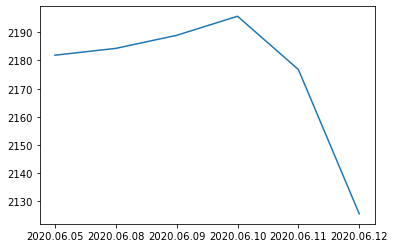

In [22]:
# 1. 코스피 지수 시각화
plt.plot(df['date'], df['KOSPI'])
plt.show()

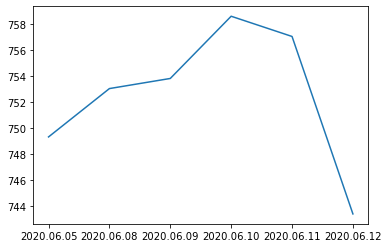

In [23]:
# 2. 코스닥지수 시각화
plt.plot(df['date'], df['KOSDAQ'])
plt.show()

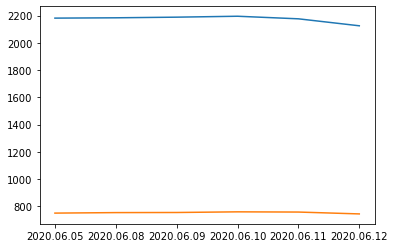

In [24]:
# 3. 같은 figure에 시각화
plt.plot(df['date'], df['KOSPI'])
plt.plot(df['date'], df['KOSDAQ'])
plt.show()

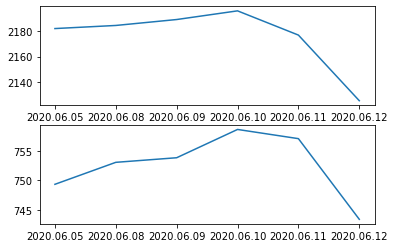

In [25]:
# 4. 서브플롯에 시각화
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['KOSPI'])
plt.subplot(2, 1, 2)
plt.plot(df['date'], df['KOSDAQ'])
plt.show()

### ▽ 잘못된 것 ▽

In [26]:
# 5. 스케일링 후 같은 figure에 그리세요.
# 어떤 스케일링?

In [27]:
# 트랜스포머 생성
ct = ColumnTransformer([
        ('standard_scaler', StandardScaler(), ['KOSPI', 'KOSDAQ'])
    ], remainder = 'passthrough')

# 원래 데이터 보존
date = df[['date']]
display(date)
ct_features = df[['KOSPI', 'KOSDAQ']]
display(ct_features)

# 표준화 후 데이터프레임으로 만들기
std_features = pd.DataFrame(ct.fit_transform(ct_features), columns=['KOSPI', 'KOSDAQ'])
std_df = pd.concat([date, std_features], axis=1).sort_values('date')
display(std_df)

,date
5,2020.06.05
4,2020.06.08
3,2020.06.09
2,2020.06.10
1,2020.06.11
0,2020.06.12


,KOSPI,KOSDAQ
5,2181.87,749.31
4,2184.29,753.04
3,2188.92,753.82
2,2195.69,758.62
1,2176.78,757.06
0,2125.57,743.37


,date,KOSPI,KOSDAQ
5,2020.06.05,-2.162826,-1.810502
4,2020.06.08,0.054558,0.893401
3,2020.06.09,0.873357,1.201515
2,2020.06.10,0.580218,0.253470
1,2020.06.11,0.379739,0.099413
0,2020.06.12,0.274954,-0.637297


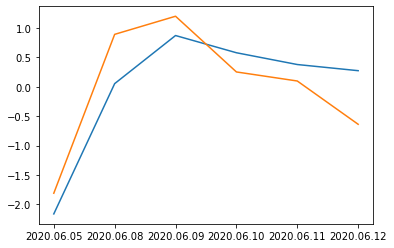

In [28]:
# plotting
plt.plot(std_df['date'], std_df['KOSPI'])
plt.plot(std_df['date'], std_df['KOSDAQ'])
plt.show()

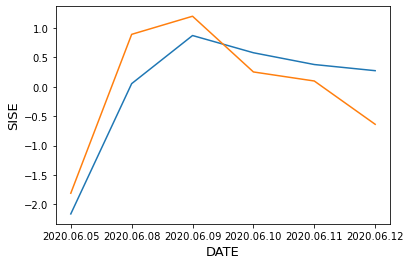

In [29]:
# 6. label을 붙여라.
plt.plot(std_df['date'], std_df['KOSPI'])
plt.plot(std_df['date'], std_df['KOSDAQ'])
plt.xlabel('DATE', fontsize=13)
plt.ylabel('SISE', fontsize=13)
plt.show()

# 점심 먹고 와서 3일치 데이터에 대해서 해볼 것!

* 수정해야 할 부분
    - 함수에 페이지 넣기
    - 크롤링할 때 한 번에 다 추가

In [30]:
# 크롤링 함수

# req 보내기
def req_urls(code, page):
    base_url = "https://finance.naver.com/sise/sise_index_day.nhn"
    params_ = {'code' : code,
               'page' : page}
    req = requests.get(base_url, params=params_)
    print(f"{req.url} : {req.status_code}")
    
    return req.text

# 체결가 크롤링
def get_sise(html, date_selector, sise_selector):
    
    soup = BeautifulSoup(html)
    
    dates = soup.select(date_selector)
    
    results = []
    for date in dates:
        results.append({
            'date': date.get_text(strip=True),
            'sise': date.find_next(sise_selector).get_text(strip=True)
        })
    
    print(results)
    return results

In [32]:
max_page = int(input("크롤링할 페이지 수를 입력하세요: "))
kospi_final, kosdaq_final = [], []

for page in range(max_page):
    
        # 코스피 지수 크롤링
    kospi = req_urls('KOSPI', page+1)
    kospi_results = get_sise(kospi, 'td.date', 'td')
    kospi_final.extend(kospi_results) # kospi_results: iterable
    
        # 코스닥 지수 크롤링
    kosdaq = req_urls('KOSDAQ', page+1)
    kosdaq_results = get_sise(kosdaq, 'td.date', 'td')
    kosdaq_final.extend(kosdaq_results) # kosdaq_results: iterable

크롤링할 페이지 수를 입력하세요: 3
https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=1 : 200
[{'date': '2020.06.12', 'sise': '2,123.75'}, {'date': '2020.06.11', 'sise': '2,176.78'}, {'date': '2020.06.10', 'sise': '2,195.69'}, {'date': '2020.06.09', 'sise': '2,188.92'}, {'date': '2020.06.08', 'sise': '2,184.29'}, {'date': '2020.06.05', 'sise': '2,181.87'}]
https://finance.naver.com/sise/sise_index_day.nhn?code=KOSDAQ&page=1 : 200
[{'date': '2020.06.12', 'sise': '743.07'}, {'date': '2020.06.11', 'sise': '757.06'}, {'date': '2020.06.10', 'sise': '758.62'}, {'date': '2020.06.09', 'sise': '753.82'}, {'date': '2020.06.08', 'sise': '753.04'}, {'date': '2020.06.05', 'sise': '749.31'}]
https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=2 : 200
[{'date': '2020.06.04', 'sise': '2,151.18'}, {'date': '2020.06.03', 'sise': '2,147.00'}, {'date': '2020.06.02', 'sise': '2,087.19'}, {'date': '2020.06.01', 'sise': '2,065.08'}, {'date': '2020.05.29', 'sise': '2,029.60'}, {'date': '2020.05

In [43]:
# dataframe으로 만들기
kospi_final_df = pd.DataFrame(kospi_final).rename(columns={'sise':'KOSPI'})
kosdaq_final_df = pd.DataFrame(kosdaq_final).rename(columns={'sise':'KOSDAQ'})

In [44]:
# dataframe 병합
df = pd.merge(kospi_final_df, kosdaq_final_df)

# 날짜 순 정렬
df = df.sort_values(by='date')
display(df.T)

# 숫자 형태로 변환
df['KOSPI'] = df['KOSPI'].str.replace(',', '')
df['KOSPI'] = pd.to_numeric(df['KOSPI'])
df['KOSDAQ'] = pd.to_numeric(df['KOSDAQ'])

,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0
date,2020.05.20,2020.05.21,2020.05.22,2020.05.25,2020.05.26,2020.05.27,2020.05.28,2020.05.29,2020.06.01,2020.06.02,2020.06.03,2020.06.04,2020.06.05,2020.06.08,2020.06.09,2020.06.10,2020.06.11,2020.06.12
KOSPI,"1,989.64","1,998.31","1,970.13","1,994.60","2,029.78","2,031.20","2,028.54","2,029.60","2,065.08","2,087.19","2,147.00","2,151.18","2,181.87","2,184.29","2,188.92","2,195.69","2,176.78","2,123.75"
KOSDAQ,708.76,716.02,708.58,719.89,729.11,724.59,708.75,713.68,735.72,743.58,737.66,742.37,749.31,753.04,753.82,758.62,757.06,743.07


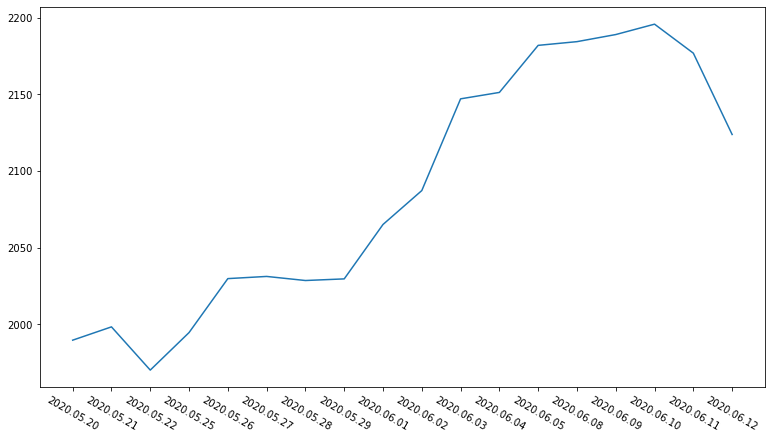

In [35]:
# 1. 코스피 지수 시각화
plt.figure(figsize=(13, 7))
plt.plot(df['date'], df['KOSPI'])
plt.xticks(rotation=-30)
plt.show()

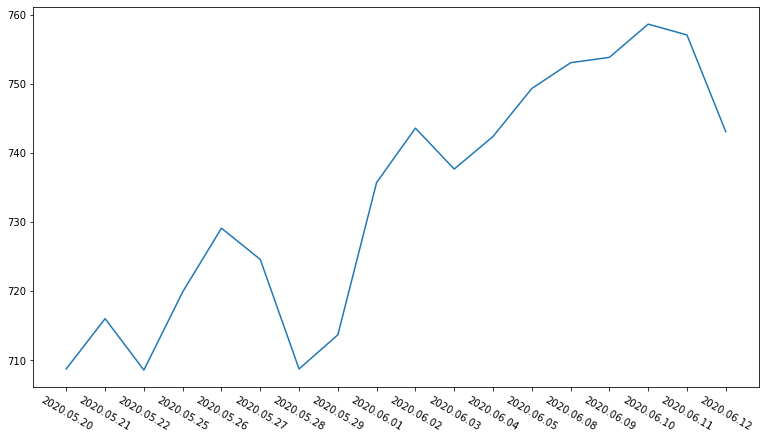

In [36]:
# 2. 코스닥 지수 시각화
plt.figure(figsize=(13, 7))
plt.plot(df['date'], df['KOSDAQ'])
plt.xticks(rotation=-30)
plt.show()

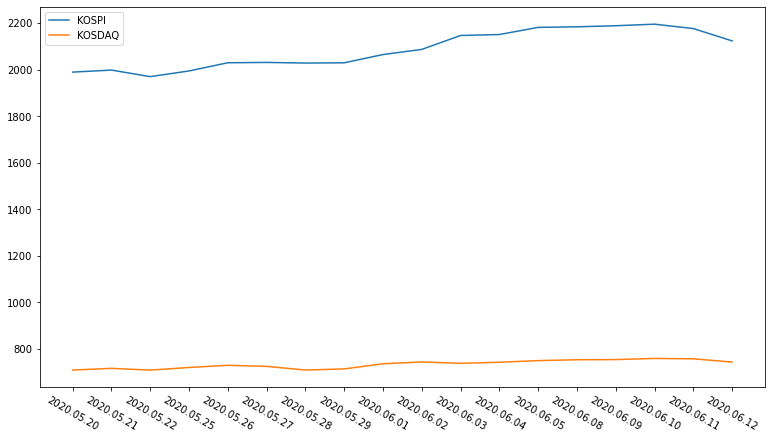

In [37]:
# 3. 같은 figure에 시각화
plt.figure(figsize=(13, 7))
plt.plot(df['date'], df['KOSPI'], label='KOSPI')
plt.plot(df['date'], df['KOSDAQ'], label='KOSDAQ')
plt.legend()
plt.xticks(rotation=-30)
plt.show()

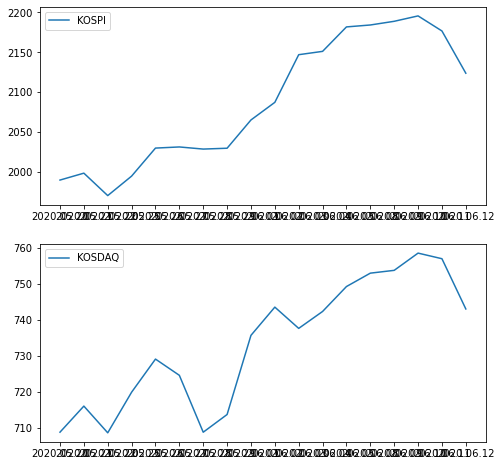

In [38]:
# 4. 서브플롯에 시각화

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['KOSPI'], label='KOSPI')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df['date'], df['KOSDAQ'], label='KOSDAQ')
plt.legend()
plt.show()

### 스케일링 : 공식 활용

,date,KOSPI,KOSDAQ,KOSPI_scaled,KOSDAQ_scaled
17,2020.05.20,1989.64,708.76,-1.210530,-1.396206
16,2020.05.21,1998.31,716.02,-1.103194,-0.987066
15,2020.05.22,1970.13,708.58,-1.452068,-1.406350
14,2020.05.25,1994.60,719.89,-1.149124,-0.768970
13,2020.05.26,2029.78,729.11,-0.713588,-0.249373
12,2020.05.27,2031.20,724.59,-0.696009,-0.504100
11,2020.05.28,2028.54,708.75,-0.728940,-1.396770
10,2020.05.29,2029.60,713.68,-0.715817,-1.118938
9,2020.06.01,2065.08,735.72,-0.276567,0.123137
8,2020.06.02,2087.19,743.58,-0.002841,0.566091


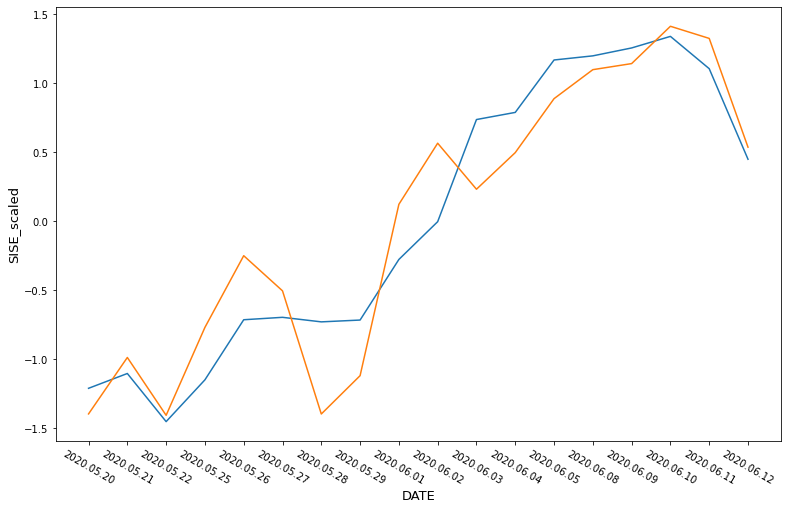

In [42]:
# 5. 스케일링 후 같은 figure에 그려라. + # 6. 라벨을 붙여라.

# 스케일링
df['KOSPI_scaled'] = (df['KOSPI'] - df['KOSPI'].mean()) / df['KOSPI'].std()
df['KOSDAQ_scaled'] = (df['KOSDAQ'] - df['KOSDAQ'].mean()) / df['KOSDAQ'].std()

display(df)

# plotting
plt.figure(figsize=(13, 8))
plt.plot(df['date'], df['KOSPI_scaled'], label='scaled KOSPI')
plt.plot(df['date'], df['KOSDAQ_scaled'], label='sclaed KOSDAQ')
plt.xlabel('DATE', fontsize=13)
plt.ylabel('SISE_scaled', fontsize=13)
plt.xticks(rotation=-30)
plt.show()

,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0
KOSPI,1989.64,1998.31,1970.13,1994.60,2029.78,2031.20,2028.54,2029.60,2065.08,2087.19,2147.00,2151.18,2181.87,2184.29,2188.92,2195.69,2176.78,2123.75
KOSDAQ,708.76,716.02,708.58,719.89,729.11,724.59,708.75,713.68,735.72,743.58,737.66,742.37,749.31,753.04,753.82,758.62,757.06,743.07


,date,KOSPI_scaled,KOSDAQ_scaled
17,2020.05.20,0.462820,0.552928
16,2020.05.21,1.138376,1.364198
15,2020.05.22,1.379273,1.454661
14,2020.05.25,1.293029,1.176313
13,2020.05.26,1.234047,1.131081
12,2020.05.27,1.203218,0.914781
11,2020.05.28,0.812254,0.512335
10,2020.05.29,0.759005,0.239206
9,2020.06.01,-0.002923,0.582502
8,2020.06.02,-0.284585,0.126707


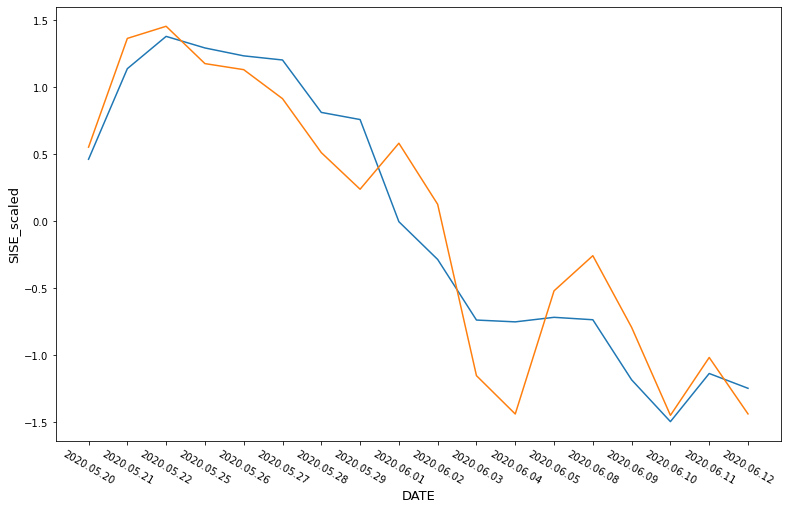

In [41]:
##### 잘못 했던 거. 뭘 잘못했지? ###########

# 트랜스포머 생성
ct = ColumnTransformer([
        ('standard_scaler', StandardScaler(), ['KOSPI', 'KOSDAQ'])
    ], remainder = 'passthrough')

# 원래 데이터 보존
date = df[['date']]
ct_features = df[['KOSPI', 'KOSDAQ']]
display(ct_features.T)

# 표준화 후 데이터프레임으로 만들기
std_features = pd.DataFrame(ct.fit_transform(ct_features), columns=['KOSPI_scaled', 'KOSDAQ_scaled'])
std_df = pd.concat([date, std_features], axis=1).sort_values('date')
display(std_df)

# plotting
plt.figure(figsize=(13, 8))
plt.plot(std_df['date'], std_df['KOSPI_scaled'], label='scaled KOSPI')
plt.plot(std_df['date'], std_df['KOSDAQ_scaled'], label='sclaed KOSDAQ')
plt.xlabel('DATE', fontsize=13)
plt.ylabel('SISE_scaled', fontsize=13)
plt.xticks(rotation=-30)
plt.show()

# -------------------------- 연습 --------------------------

In [ ]:
tds = soup.select('td.date')
for idx, td in enumerate(tds):
    print(idx, td)

In [ ]:
for td in tds:
    print(td.findNext('td'))

In [ ]:
# 코스피 지수 데이터

kospi = req_url('KOSPI')
soup = BeautifulSoup(kospi, 'lxml')
dates = soup.select('td.date')

kospi_results = []
for date in dates:
    kospi_results.append({
        'date' : date.get_text(strip=True),
        'sise' : date.find_next('td').get_text(strip=True)
    })

print(kospi_results)

In [ ]:
# 코스닥 지수 데이터

kosdaq = req_url('KOSDAQ')
soup = BeautifulSoup(kosdaq, 'lxml')
dates = soup.select('td.date')

kosdaq_results = []
for date in dates:
    kosdaq_results.append({
        'date' : date.get_text(strip=True),
        'sise' : date.find_next('td').get_text(strip=True)
    })

print(kosdaq_results)

## 강사님 풀이

- dictionary와 키를 이용해서 형성하는 방법! 간결하다

In [63]:
url = 'https://finance.naver.com/sise/sise_index_day.nhn'

target_codes= ['KOSPI', 'KOSDAQ'] # 자료 저장, 쿼리스트링 전달 모두 유용.
max_page = int(input('크롤링할 페이지 수를 입력하세요: '))

result_dict = {}

for code in target_codes:
    result_dict[code] = [] # 키에 해당하는 리스트에 각 정보 저장
    
    for page in range(1, max_page + 1):
        params = {
            'code': code,
            'page': page
        }
        resp = requests.get(url, params=params)
        soup = BeautifulSoup(resp.text)
        tr_tags = soup.find_all('tr')
        
        for tr in tr_tags:
            date = tr.find('td', class_='date')
            if not date: # date가 없으면
                continue
            date = date.text
            
            number = tr.find('td', class_='number_1').text
            
            result_dict[code].append(dict(date=date, number=number))
        



크롤링할 페이지 수를 입력하세요: 3


In [64]:
pprint(result_dict)

{'KOSDAQ': [{'date': '2020.06.12', 'number': '745.35'},
            {'date': '2020.06.11', 'number': '757.06'},
            {'date': '2020.06.10', 'number': '758.62'},
            {'date': '2020.06.09', 'number': '753.82'},
            {'date': '2020.06.08', 'number': '753.04'},
            {'date': '2020.06.05', 'number': '749.31'},
            {'date': '2020.06.04', 'number': '742.37'},
            {'date': '2020.06.03', 'number': '737.66'},
            {'date': '2020.06.02', 'number': '743.58'},
            {'date': '2020.06.01', 'number': '735.72'},
            {'date': '2020.05.29', 'number': '713.68'},
            {'date': '2020.05.28', 'number': '708.75'},
            {'date': '2020.05.27', 'number': '724.59'},
            {'date': '2020.05.26', 'number': '729.11'},
            {'date': '2020.05.25', 'number': '719.89'},
            {'date': '2020.05.22', 'number': '708.58'},
            {'date': '2020.05.21', 'number': '716.02'},
            {'date': '2020.05.20', 'number': '70

In [65]:
# 데이터프레임
kospi_df = pd.DataFrame(result_dict['KOSPI'])
kosdaq_df = pd.DataFrame(result_dict['KOSDAQ'])

In [66]:
kospi_df.head()

,date,number
0,2020.06.12,"2,129.05"
1,2020.06.11,"2,176.78"
2,2020.06.10,"2,195.69"
3,2020.06.09,"2,188.92"
4,2020.06.08,"2,184.29"


In [67]:
kospi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18 non-null     object
 1   number  18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


In [68]:
# 데이터타입 변환
kospi_df['number'] = kospi_df['number'].apply(lambda x: "".join(x.split(','))) # comma 없애기
kospi_df['number'] = kospi_df['number'].astype(np.float64)
kospi_df['date'] = kospi_df['date'].astype(np.datetime64)
kosdaq_df['number'] = kosdaq_df['number'].apply(lambda x: "".join(x.split(','))) # comma 없애기
kosdaq_df['number'] = kosdaq_df['number'].astype(np.float64)
kosdaq_df['date'] = kosdaq_df['date'].astype(np.datetime64)

In [69]:
kospi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18 non-null     datetime64[ns]
 1   number  18 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 416.0 bytes


In [70]:
kosdaq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18 non-null     datetime64[ns]
 1   number  18 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 416.0 bytes


In [72]:
# 정렬
kospi_df = kospi_df.sort_values(by='date')
kosdaq_df = kosdaq_df.sort_values(by='date')
kospi_df.head(2), kosdaq_df.head(2)

(         date   number
 17 2020-05-20  1989.64
 16 2020-05-21  1998.31,
          date  number
 17 2020-05-20  708.76
 16 2020-05-21  716.02)

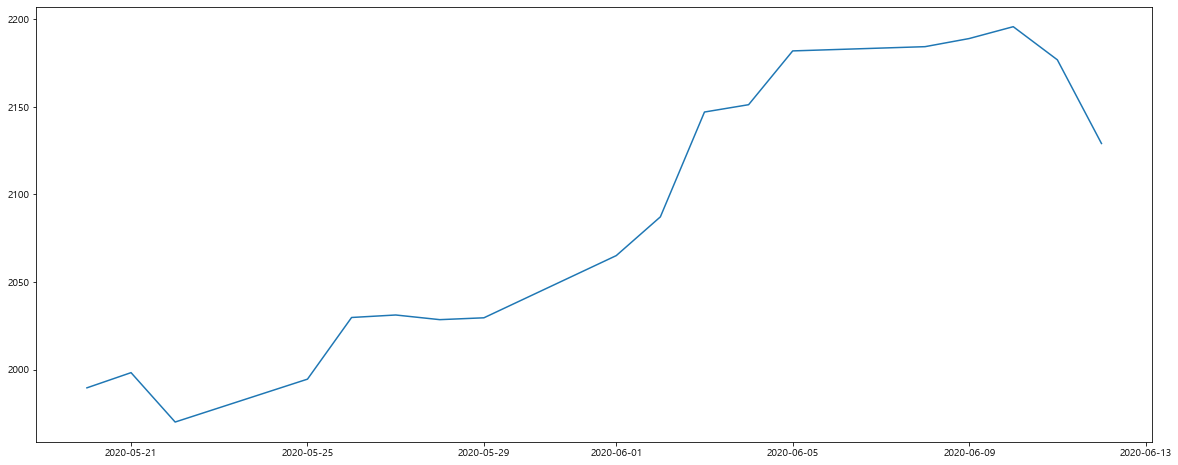

In [73]:
# plotting
plt.figure(figsize=(20, 8))
plt.plot(kospi_df['date'], kospi_df['number'])
plt.show()

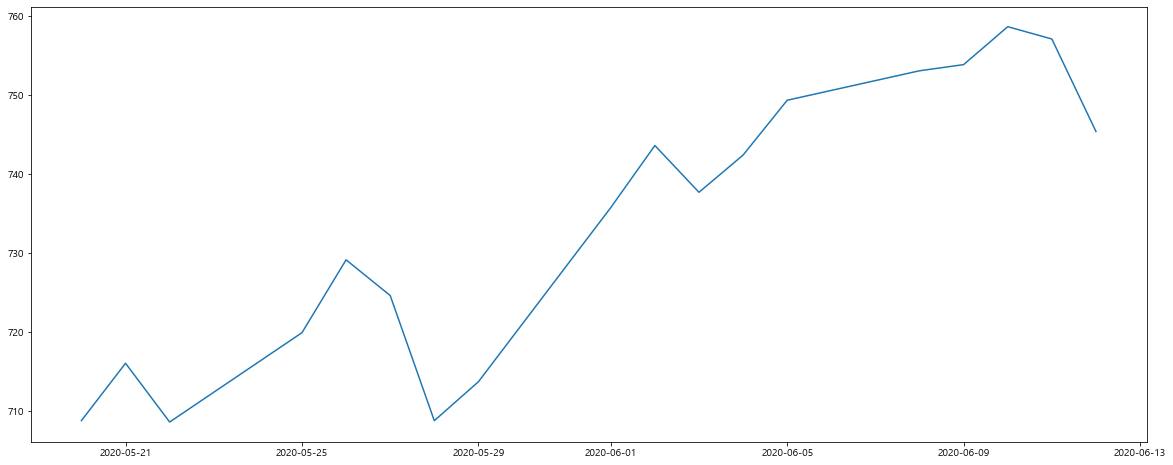

In [74]:
plt.figure(figsize=(20, 8))
plt.plot(kosdaq_df['date'], kosdaq_df['number'])
plt.show()

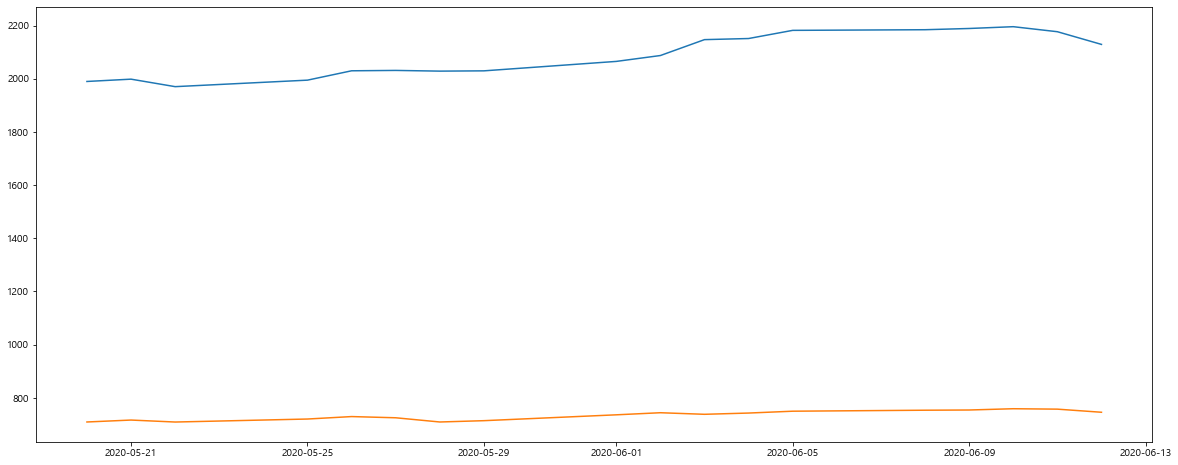

In [76]:
plt.figure(figsize=(20, 8))
plt.plot(kospi_df['date'], kospi_df['number'], kosdaq_df['date'], kosdaq_df['number'])
plt.show()

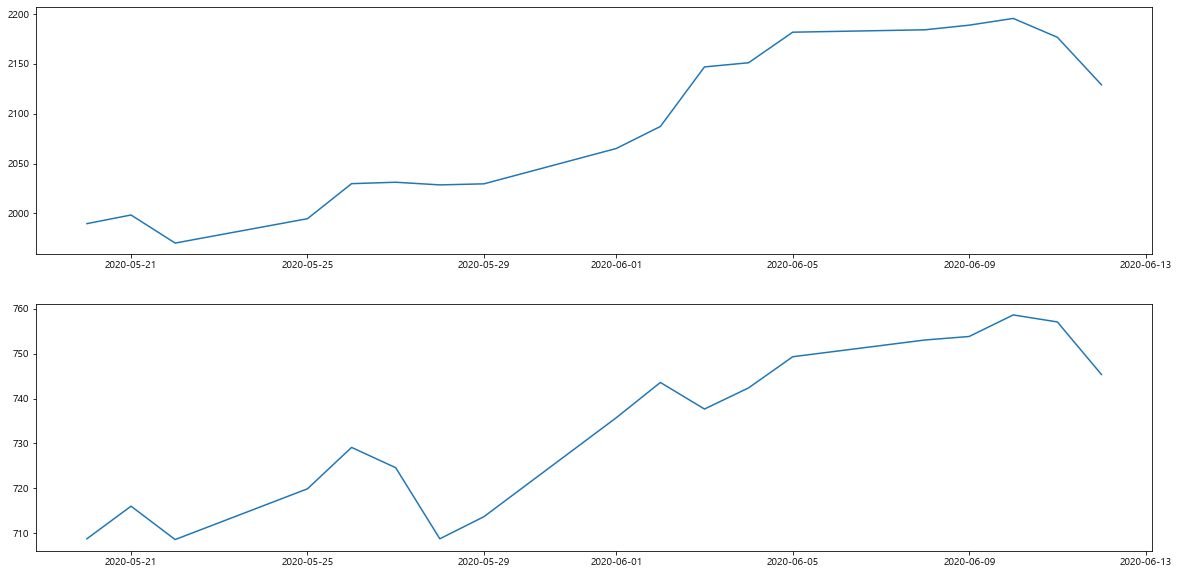

In [77]:
# plot subplots
plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.plot(kospi_df['date'], kospi_df['number'])

plt.subplot(2,1,2)
plt.plot(kosdaq_df['date'], kosdaq_df['number'])

plt.show()

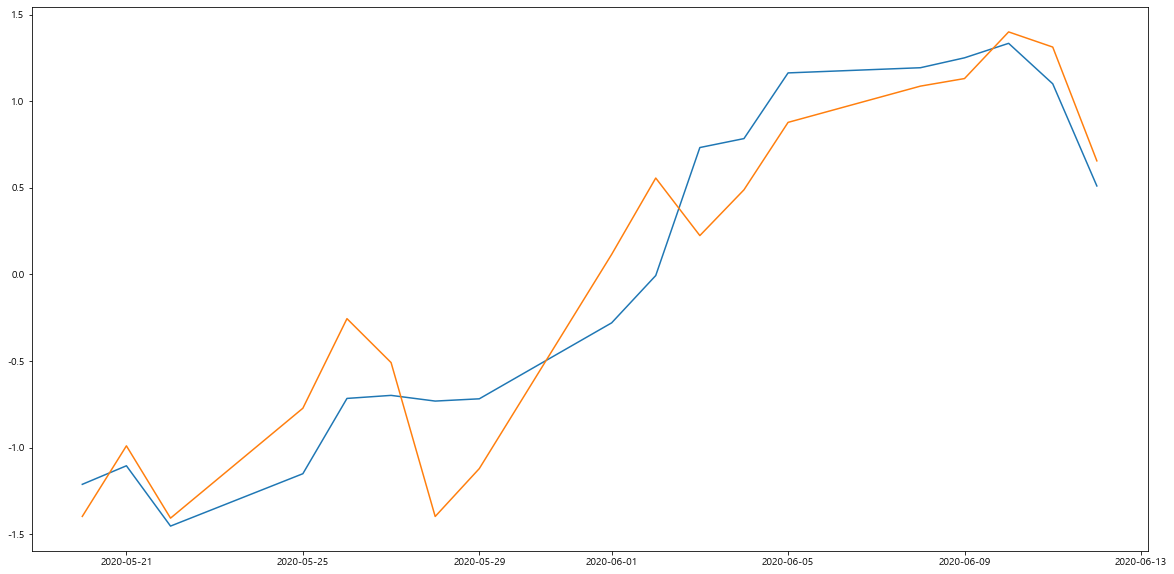

In [78]:
# 스케일링
kospi_df['scaled_number'] = (kospi_df['number']-kospi_df['number'].mean()) / kospi_df['number'].std()
kosdaq_df['scaled_number'] = (kosdaq_df['number']-kosdaq_df['number'].mean()) / kosdaq_df['number'].std()

# plotting
plt.figure(figsize=(20, 10))
plt.plot(kospi_df['date'], kospi_df['scaled_number'])
plt.plot(kosdaq_df['date'], kosdaq_df['scaled_number'])

plt.show()

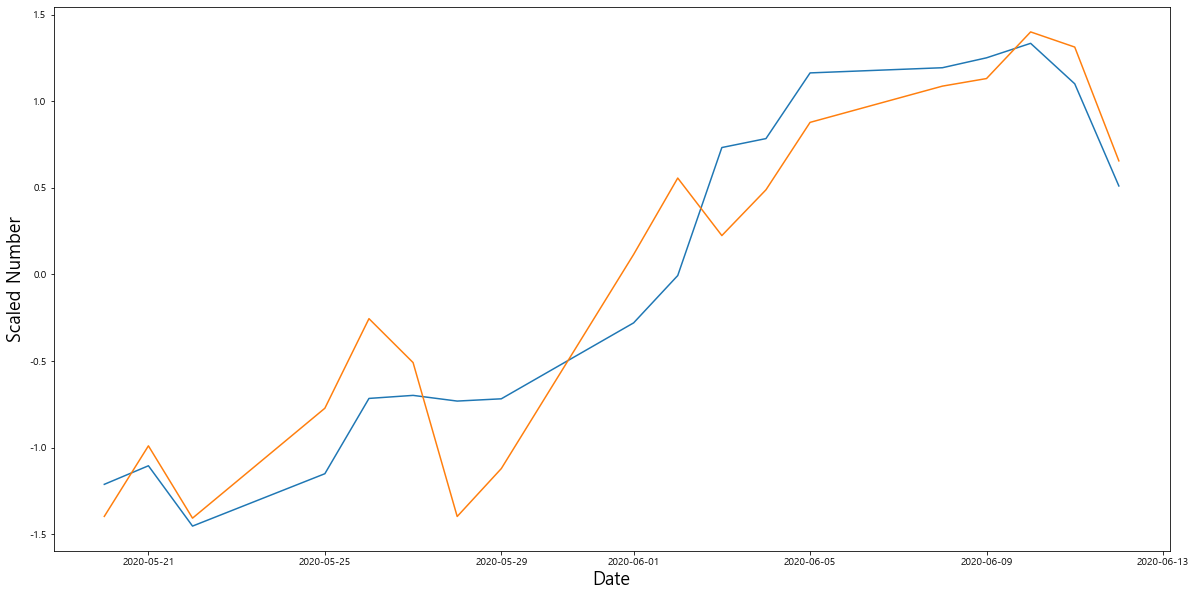

In [79]:
# label
plt.figure(figsize=(20, 10))
plt.plot(kospi_df['date'], kospi_df['scaled_number'])
plt.plot(kosdaq_df['date'], kosdaq_df['scaled_number'])

plt.xlabel("Date", fontdict={'fontsize':18})
plt.ylabel("Scaled Number", fontdict={'fontsize':18})

plt.show()

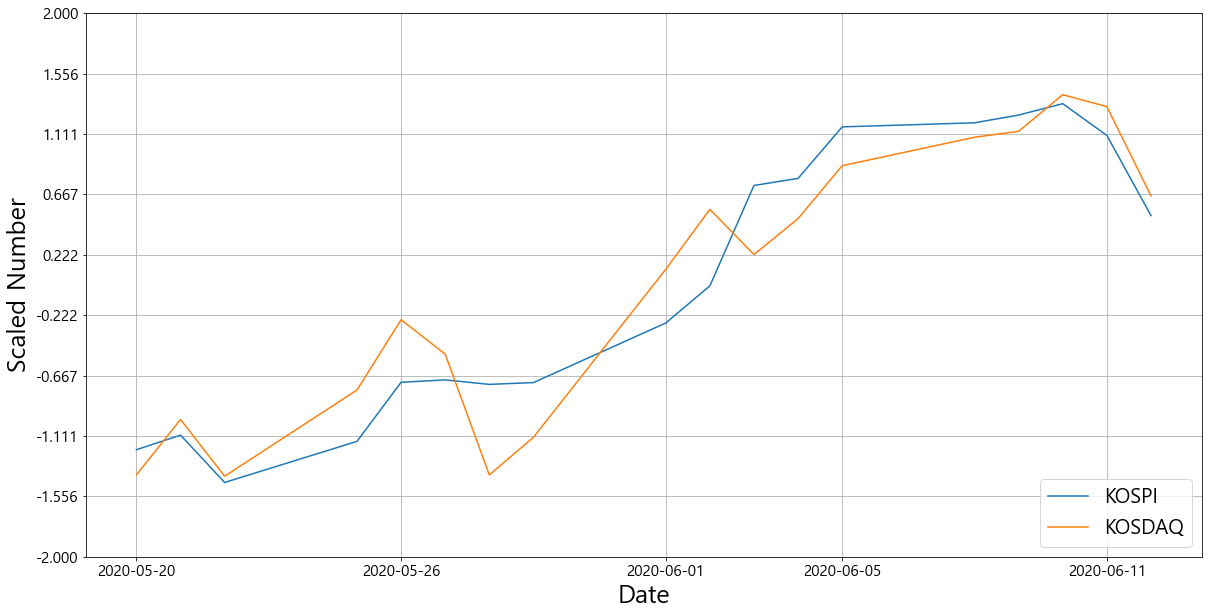

In [81]:
# plotting
plt.figure(figsize=(20,10))
plt.plot(kospi_df['date'], kospi_df['scaled_number'], label='KOSPI')
plt.plot(kosdaq_df['date'], kosdaq_df['scaled_number'], label='KOSDAQ')

plt.xlabel('Date', fontdict={'fontsize': 25})
plt.ylabel('Scaled Number', fontdict={'fontsize': 25})

plt.xticks(kospi_df['date'][::4], fontsize=15)
plt.yticks(np.linspace(-2, 2, 10), fontsize=15)

plt.legend(fontsize=20, loc='lower right')

plt.grid() # 격자 표시

plt.show()

# 한국어 사용

In [46]:
# 한글 폰트 설정
import platform
from matplotlib import font_manager, rc

# 한글 설정 시 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# OS 시스템별로
if platform.system() == 'Darwin': # mac
    print('MAC os')
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    print('Windows os')
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown OS system. Sorry!")    

Windows os
